In [22]:
import numpy as np  
from landaupy import landau
import matplotlib.pyplot as plt

# Choose directory where to save output plot 
outdir = './plots/'

# Define physics useful constants   

m0 = 105.6583745 # MeV, muon mass
me = 0.510998950 # MeV, electron mass 

# Define cylinder tank dimensions 
h = 120 #cm 
r = 180 #cm 

# Look up material properties (water)
# https://pdg.lbl.gov/2024/AtomicNuclearProperties/HTML/water_liquid.html  

Z_A=0.55509 #mol g^-1, atomic number Z over atomic mass mol g^-1 
rho=1 #g cm^-3, density of liquid water 
I=7.97e-5 #MeV, mean excitation energy

K=0.307075 #MeV mol^−1 cm2

# Define kinetic energy of the muon 

ek = 1000. # 1000 MeV = 1 GeV 


In [23]:
def _beta(ek):
    return np.sqrt(ek*ek + 2*ek*m0) / (ek+m0) 
def _gamma(ek): 
    return 1 / np.sqrt( 1 - _beta(ek)*_beta(ek) ) 

beta = _beta(ek)
gamma = _gamma(ek)

In [40]:
# Define a function that computes energy losses of a single muon 
# step by step in the tank, extracting from a Landau distribution,
# and gives as an output the total energy deposited

def _eloss_step_landau(_ek, _dx,):
    tmp_beta = _beta(_ek)
    tmp_gamma = _gamma(_ek) 
    width =  K/2*Z_A*(_dx*rho/tmp_beta**2) 
    mpv = width \
            *( np.log(2*me*tmp_beta**2*tmp_gamma**2/I) \
                +np.log(width/I) + 0.2
                         -tmp_beta**2 )
    _eloss = landau.sample(x_mpv=mpv, xi=width, n_samples=1) 
    return _eloss
         

In [ ]:

# Now define a function that propagates the muon inside the tank for its full track lenght, 
# computing the energy loss at each step from a Landau distribution.
# Have the function return the total energy deposited. 
# This function will be iterated for multiple muons.    

def _eloss_tank_landau(_ek,_dx): 
    tmp_ek = _ek
    tmp_beta = _beta(tmp_ek)
    tmp_gamma = _gamma(tmp_ek) 
    
    _tot_eloss_tank = 0. 
    nsteps = int(h/_dx) 
    
    for i in range(nsteps): 

        _eloss =  _eloss_step_landau(tmp_ek,_dx)
        _tot_eloss_tank += _eloss

        # Update particle energy 
        tmp_ek = tmp_ek - _eloss  
        tmp_beta = _beta(ek)
        tmp_gamma = _gamma(ek) 
       

    return _tot_eloss_tank

In [61]:
# Choose step size and number of toy muons you want to launch 

dx = 10 #cm 

n_iter = 5000
eloss_array = np.zeros(n_iter)

for i in range(n_iter): 
    eloss_array[i] = _eloss_tank_landau(ek,dx) 

NameError: name 'outdir' is not defined

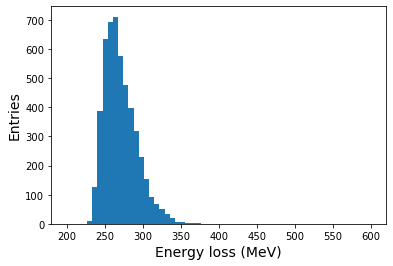

In [64]:
# Plot histogram of total energy loss for the toy muons 
plt.figure(1) 
#plt.yscale('log')
plt.xlabel('Energy loss (MeV)', size=14)
plt.ylabel('Entries', size=14)

hist = plt.hist(eloss_array  ,bins = np.linspace(200.,600,60))
plt.savefig(outdir+'/toymu_'+str(n_iter)+'_eloss.eps',format = 'eps',bbox_inches='tight')
